In [360]:
import pandas as pd
import urllib.request
from pprint import pprint
import re
import string
from bs4 import BeautifulSoup
import io

pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns',None) #display all columns
pd.set_option('display.max_rows',None) #display all rows

# Required Input files
# When running for the very first time, `ipl2025_results.csv`` file is required with all the team managers and an initial row of 0s.
# IPL2025MockAuctionSummary.csv file is required with each of the managers, their teams and their players listed.

# Dependencies to install
#  pip3 install beautifulsoup4
#  pip3 install lxml ??? (Double check if required)
#  pip3 install html5lib ??? (Double check if required)
#  pip3 install pywhatkit
#  pip3 install matplotlib
#  pip3 install selenium

In [361]:
# Get all players for ipl2025
import requests

# Headers to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# URL of the IPL players page
urls = [
    'https://www.iplt20.com/teams/chennai-super-kings',
    'https://www.iplt20.com/teams/delhi-capitals',
    'https://www.iplt20.com/teams/gujarat-titans',
    'https://www.iplt20.com/teams/kolkata-knight-riders',
    'https://www.iplt20.com/teams/lucknow-super-giants',
    'https://www.iplt20.com/teams/mumbai-indians',
    'https://www.iplt20.com/teams/punjab-kings',
    'https://www.iplt20.com/teams/rajasthan-royals',
    'https://www.iplt20.com/teams/royal-challengers-bangalore',
    'https://www.iplt20.com/teams/sunrisers-hyderabad',
]
players = []
for url in urls:
    # Send GET request
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')

    player_divs = soup.find_all('div', class_='ih-p-name')
    players += [player_div.find('h2').get_text(strip=True) for player_div in player_divs]
players

['Ruturaj Gaikwad',
 'MS Dhoni',
 'Devon Conway',
 'Rahul Tripathi',
 'Shaik Rasheed',
 'Vansh Bedi',
 'Andre Siddarth',
 'Rachin Ravindra',
 'Ravichandran Ashwin',
 'Vijay Shankar',
 'Sam Curran',
 'Anshul Kamboj',
 'Deepak Hooda',
 'Jamie Overton',
 'Kamlesh Nagarkoti',
 'Ramakrishna Ghosh',
 'Ravindra Jadeja',
 'Shivam Dube',
 'Khaleel Ahmed',
 'Noor Ahmad',
 'Mukesh Choudhary',
 'Gurjapneet Singh',
 'Nathan Ellis',
 'Shreyas Gopal',
 'Matheesha Pathirana',
 'KL Rahul',
 'Jake Fraser-McGurk',
 'Karun Nair',
 'Faf du Plessis',
 'Donovan Ferreira',
 'Abishek Porel',
 'Tristan Stubbs',
 'Axar Patel',
 'Sameer Rizvi',
 'Ashutosh Sharma',
 'Darshan Nalkande',
 'Vipraj Nigam',
 'Ajay Mandal',
 'Manvanth Kumar',
 'Tripurana Vijay',
 'Madhav Tiwari',
 'Mitchell Starc',
 'T. Natarajan',
 'Mohit Sharma',
 'Mukesh Kumar',
 'Dushmantha Chameera',
 'Kuldeep Yadav',
 'Shubman Gill',
 'Jos Buttler',
 'Kumar Kushagra',
 'Anuj Rawat',
 'Sherfane Rutherford',
 'Glenn Phillips',
 'Nishant Sindhu',
 'M

In [362]:
# Backup the input and output files for each day for posterity
import shutil
import datetime
now = datetime.datetime.now()
timestamp = str(now.strftime("_%Y_%m_%d_%H"))

ipl_file = './ipl2025.html'
ipl_backup_file = ipl_file + timestamp
shutil.copy(ipl_file, ipl_backup_file)

results_file = './ipl2025_results.csv'
results_file_backup = results_file + timestamp
shutil.copy(results_file, results_file_backup)

'./ipl2025_results.csv_2025_03_22_11'

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = webdriver.Chrome()

url = 'https://www.iplt20.com/stats/2025'
driver.get(url)

button = driver.find_element(By.CLASS_NAME, "awardsStats")

button.click()

button = driver.find_element(By.CLASS_NAME, "ups")

button.click()

button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH, ".//a[contains(@ng-click, 'showAllmvp')]"))
)

driver.execute_script("arguments[0].click();", button)

html = driver.page_source

f = open(ipl_file, "w")
f.write(html)
f.close()

driver.quit()

html



'<html lang="en"><head><style type="text/css">@charset "UTF-8";[ng\\:cloak],[ng-cloak],[data-ng-cloak],[x-ng-cloak],.ng-cloak,.x-ng-cloak,.ng-hide:not(.ng-hide-animate){display:none !important;}ng\\:form{display:block;}.ng-animate-shim{visibility:hidden;}.ng-anchor{position:absolute;}</style><style type="text/css" id="bc-style-vjs" data-vjs-version="7.21.4">@charset "UTF-8";.video-js .vjs-big-play-button .vjs-icon-placeholder:before,.video-js .vjs-modal-dialog,.vjs-button>.vjs-icon-placeholder:before,.vjs-modal-dialog .vjs-modal-dialog-content{position:absolute;top:0;left:0;width:100%;height:100%}.video-js .vjs-big-play-button .vjs-icon-placeholder:before,.vjs-button>.vjs-icon-placeholder:before{text-align:center}@font-face{font-family:VideoJS;src:url(data:application/font-woff;charset=utf-8;base64,d09GRgABAAAAABDkAAsAAAAAG6gAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAABHU1VCAAABCAAAADsAAABUIIslek9TLzIAAAFEAAAAPgAAAFZRiV3hY21hcAAAAYQAAADaAAADPv749/pnbHlmAAACYAAAC3AAABHQZg6OcWhlYWQAAA3QAAAAKwAAADYZw2

In [364]:
tables = pd.read_html(io.StringIO(html))
mvp_df = [table for table in tables if 'Pts' in table][0]
## Clean up Player coloumn
mvp_df[['Player', 'Team']] = mvp_df['Player'].str.rsplit(' ', n=1, expand=True)
mvp_df['Player'] = mvp_df['Player'].replace('\\s+', ' ', regex=True)
mvp_df

,POS,Player,Pts,Mat,Wkts,Dots,4s,6s,Catches,Run outs,Stumpings,Team
0,1,Sunil Narine,450.0,15,17,127,50,33,8,3.0,0,KKR
1,2,Virat Kohli,315.5,15,0,0,62,38,8,7.5,0,RCB
2,3,Travis Head,274.0,15,0,2,64,32,0,0.0,0,SRH
3,4,Abhishek Sharma,273.5,16,2,12,36,42,7,0.0,0,SRH
4,5,Pat Cummins,259.0,16,18,125,9,8,7,3.0,0,SRH
5,6,Andre Russell,249.5,15,19,68,20,16,3,1.5,0,KKR
6,7,Phil Salt,245.0,12,0,0,50,24,12,6.0,0,KKR
7,8,Sam Curran,238.5,13,16,84,24,6,7,0.0,0,PBKS
8,9,Riyan Parag,238.0,16,0,5,40,33,7,0.0,0,RR
9,10,Nicholas Pooran,234.0,14,0,0,35,36,7,3.0,0,LSG


In [365]:
ipl_mock_auction_summary = './IPL2025MockAuctionSummary.csv'
fantasy_teams_auction_df = pd.read_csv(ipl_mock_auction_summary)
fantasy_teams_auction_df

,Shashaank,Naren,Sriram,Mahaarajan,Srikumar,Sudarshan,Niranjini,Raghav,Priyanka
0,Punjab Kings,Gujarat Titans,Delhi Capitals,Royal Challengers Bengaluru,Rajasthan Royals,Chennai Super Kings,Sunrisers Hyderabad,Mumbai Indians,Kolkata Knight Riders
1,Glenn Maxwell,Shubman Gill,KL Rahul,Virat Kohli,Yashasvi Jaiswal,Matheesha Pathirana,Travis Head,N. Tilak Varma,Venkatesh Iyer
2,Marcus Stoinis,Aiden Markram,Mitchell Starc,Arshdeep Singh,Nitish Rana,Ruturaj Gaikwad,Abhishek Sharma,Suryakumar Yadav,Sunil Narine
3,Shreyas Iyer,Quinton de Kock,Axar Patel,Washington Sundar,Deepak Chahar,Noor Ahmad,Heinrich Klaasen,Trent Boult,Andre Russell
4,Rahul Tripathi,Lockie Ferguson,Mohammed Siraj,Hardik Pandya,Maheesh Theekshana,Abhinav Manohar,Mukesh Kumar,Khaleel Ahmed,T Natarajan
5,Vaibhav Arora,Abdul Samad,Rinku Singh,Mohsin Khan,Rohit Sharma,Mohammad Shami,Harpreet Brar,Nicholas Pooran,Akash Deep
6,Mukesh Choudhary,Kuldeep Yadav,Will Jacks,Tim David,Jos Buttler,Deepak Hooda,Wanindu Hasaranga,Gerald Coetzee,Abishek Porel
7,Shahrukh Khan,Ravichandran Ashwin,Shashank Singh,Shamar Joseph,Devon Conway,Shahbaz Ahamad,Rahul Chahar,Krunal Pandya,Sherfane Rutherford
8,Robin Minz,Varun Chakaravarthy,Angkrish Raghuvanshi,Devdutt Padikkal,Tristan Stubbs,Pat Cummins,Jitesh Sharma,Nathan Ellis,Manish Pandey
9,Ishan Kishan,Liam Livingstone,Mohit Sharma,Rishabh Pant,Rachin Ravindra,MS Dhoni,Bhuvneshwar Kumar,B. Sai Sudharsan,Ajinkya Rahane


In [366]:
fantasy_mgrs = fantasy_teams_auction_df.columns
fantasy_mgrs.to_list()

['Shashaank',
 'Naren',
 'Sriram',
 'Mahaarajan',
 'Srikumar',
 'Sudarshan',
 'Niranjini',
 'Raghav',
 'Priyanka']

In [367]:
#Make new dataframe for manager_teams 
fantasy_mgr_teams = fantasy_teams_auction_df.iloc[:1]
fantasy_mgr_teams

,Shashaank,Naren,Sriram,Mahaarajan,Srikumar,Sudarshan,Niranjini,Raghav,Priyanka
0,Punjab Kings,Gujarat Titans,Delhi Capitals,Royal Challengers Bengaluru,Rajasthan Royals,Chennai Super Kings,Sunrisers Hyderabad,Mumbai Indians,Kolkata Knight Riders


In [368]:
#Create new dataframe for manager_players
fantasy_teams_df = fantasy_teams_auction_df.iloc[1:]
fantasy_teams_df

,Shashaank,Naren,Sriram,Mahaarajan,Srikumar,Sudarshan,Niranjini,Raghav,Priyanka
1,Glenn Maxwell,Shubman Gill,KL Rahul,Virat Kohli,Yashasvi Jaiswal,Matheesha Pathirana,Travis Head,N. Tilak Varma,Venkatesh Iyer
2,Marcus Stoinis,Aiden Markram,Mitchell Starc,Arshdeep Singh,Nitish Rana,Ruturaj Gaikwad,Abhishek Sharma,Suryakumar Yadav,Sunil Narine
3,Shreyas Iyer,Quinton de Kock,Axar Patel,Washington Sundar,Deepak Chahar,Noor Ahmad,Heinrich Klaasen,Trent Boult,Andre Russell
4,Rahul Tripathi,Lockie Ferguson,Mohammed Siraj,Hardik Pandya,Maheesh Theekshana,Abhinav Manohar,Mukesh Kumar,Khaleel Ahmed,T Natarajan
5,Vaibhav Arora,Abdul Samad,Rinku Singh,Mohsin Khan,Rohit Sharma,Mohammad Shami,Harpreet Brar,Nicholas Pooran,Akash Deep
6,Mukesh Choudhary,Kuldeep Yadav,Will Jacks,Tim David,Jos Buttler,Deepak Hooda,Wanindu Hasaranga,Gerald Coetzee,Abishek Porel
7,Shahrukh Khan,Ravichandran Ashwin,Shashank Singh,Shamar Joseph,Devon Conway,Shahbaz Ahamad,Rahul Chahar,Krunal Pandya,Sherfane Rutherford
8,Robin Minz,Varun Chakaravarthy,Angkrish Raghuvanshi,Devdutt Padikkal,Tristan Stubbs,Pat Cummins,Jitesh Sharma,Nathan Ellis,Manish Pandey
9,Ishan Kishan,Liam Livingstone,Mohit Sharma,Rishabh Pant,Rachin Ravindra,MS Dhoni,Bhuvneshwar Kumar,B. Sai Sudharsan,Ajinkya Rahane
10,Jake Fraser-McGurk,Harshit Rana,Kagiso Rabada,Rasikh Dar,Sandeep Sharma,Akash Madhwal,Yuzvendra Chahal,Fazalhaq Farooqi,Shimron Hetmyer


In [369]:
# Compute total score for each fantasy team based on MVP points of each player
scores = { fantasy_mgr:0 for fantasy_mgr in fantasy_mgrs.to_list() }
for mgr in fantasy_mgrs:
    print(mgr)
    all_players_have_min_pts = True
    for i in range(len(fantasy_teams_df[mgr])):
        player_name = str(fantasy_teams_df[mgr].iloc[i])
        if player_name in mvp_df['Player'].to_list() and player_name in players:
            player_score = float(mvp_df.loc[mvp_df['Player'] == fantasy_teams_df[mgr].iloc[i],'Pts'].iloc[0])
            scores[mgr] += player_score
            # print(f'\t{player_name} points found. Adding his score {player_score} to total. New score {scores[mgr]}')
        elif player_name in players:
            print(f'\t{player_name} found in ipl 2025 website, but no points yet.')
            all_players_have_min_pts = False
        else:
            print(f'\t{player_name} not found in mvp_table... Double check the spelling of player name.')
            all_players_have_min_pts = False
    if all_players_have_min_pts:
        print(f'All players have min fantasy points.')

Shashaank
	Robin Minz found in ipl 2025 website, but no points yet.
	Jofra Archer found in ipl 2025 website, but no points yet.
Naren
	Quinton de Kock found in ipl 2025 website, but no points yet.
	Glenn Phillips found in ipl 2025 website, but no points yet.
Sriram
	KL Rahul found in ipl 2025 website, but no points yet.
	Karun Nair found in ipl 2025 website, but no points yet.
Mahaarajan
	Jacob Bethell found in ipl 2025 website, but no points yet.
Srikumar
	Devon Conway found in ipl 2025 website, but no points yet.
Sudarshan
	Mohammad Shami found in ipl 2025 website, but no points yet.
Niranjini
	Wanindu Hasaranga found in ipl 2025 website, but no points yet.
Raghav
	N. Tilak Varma found in ipl 2025 website, but no points yet.
	Suryakumar Yadav not found in mvp_table... Double check the spelling of player name.
	B. Sai Sudharsan not found in mvp_table... Double check the spelling of player name.
	Fazalhaq Farooqi found in ipl 2025 website, but no points yet.
	Vaibhav Suryavanshi found 

In [370]:
scores

{'Shashaank': 1256.5,
 'Naren': 1419.0,
 'Sriram': 1580.5,
 'Mahaarajan': 1420.5,
 'Srikumar': 1322.0,
 'Sudarshan': 1234.0,
 'Niranjini': 1858.0,
 'Raghav': 906.5,
 'Priyanka': 1401.0}

In [374]:
import requests

url = 'https://www.espncricinfo.com/series/ipl-2025-1449924/points-table-standings'
response = requests.get(url, headers=headers)
response.raise_for_status()

tables = pd.read_html(io.StringIO(response.text))

ipl_team_pts_tbl = [table for table in tables if 'PT' in table][0]
ipl_team_pts_tbl = ipl_team_pts_tbl.iloc[::2]
ipl_team_pts_tbl = ipl_team_pts_tbl.iloc[:, :12]
ipl_team_pts_tbl['Teams'] = ipl_team_pts_tbl['Teams'].replace('\\s+', ' ', regex=True).replace('\\d', '', regex=True)
ipl_team_pts_tbl

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,Next,For,Against
0,Royal Challengers Bengaluru,1,1,0,0,0,2,2.137,W,"vs CSK, GT, MI",177/16.2,174/20.0
2,Kolkata Knight Riders,1,0,1,0,0,0,-2.137,L,"vs RR, MI, SRH",174/20.0,177/16.2
4,Chennai Super Kings,-,-,-,-,-,-,-,NaN,"vs MI, RCB, RR",-,-
6,Delhi Capitals,-,-,-,-,-,-,-,NaN,"vs LSG, SRH, CSK",-,-
8,Gujarat Titans,-,-,-,-,-,-,-,NaN,"vs PBKS, MI, RCB",-,-
10,Lucknow Super Giants,-,-,-,-,-,-,-,NaN,"vs DC, SRH, PBKS",-,-
12,Mumbai Indians,-,-,-,-,-,-,-,NaN,"vs CSK, GT, KKR",-,-
14,Punjab Kings,-,-,-,-,-,-,-,NaN,"vs GT, LSG, RR",-,-
16,Rajasthan Royals,-,-,-,-,-,-,-,NaN,"vs SRH, KKR, CSK",-,-
18,Sunrisers Hyderabad,-,-,-,-,-,-,-,NaN,"vs RR, LSG, DC",-,-


In [ ]:
for mgr in fantasy_teams_df.columns:
    no_of_wins = 0
    if fantasy_mgr_teams[mgr].item() in ipl_team_pts_tbl.Teams.to_list():
        no_of_wins = ipl_team_pts_tbl.loc[ipl_team_pts_tbl['Teams'] == fantasy_mgr_teams[mgr].item(),'W'].item()
        if no_of_wins == '-':
            no_of_wins=0
        scores[mgr] += (float(no_of_wins)*50)
        print(f'{str(mgr)}\t{str(fantasy_mgr_teams[mgr].values)}\t{str(no_of_wins)}')

-
Shashaank	['Punjab Kings']	0
-
Naren	['Gujarat Titans']	0
-
Sriram	['Delhi Capitals']	0
1
Mahaarajan	['Royal Challengers Bengaluru']	1
-
Srikumar	['Rajasthan Royals']	0
-
Sudarshan	['Chennai Super Kings']	0
-
Niranjini	['Sunrisers Hyderabad']	0
-
Raghav	['Mumbai Indians']	0
0
Priyanka	['Kolkata Knight Riders']	0


In [ ]:
prev_scores = pd.read_csv(results_file)
prev_scores_dicts = prev_scores.to_dict(orient='records')
prev_scores_dicts

[{'Shashaank': 0.0,
  'Naren': 0.0,
  'Sriram': 0.0,
  'Mahaarajan': 0.0,
  'Srikumar': 0.0,
  'Sudarshan': 0.0,
  'Niranjini': 0.0,
  'Raghav': 0.0,
  'Priyanka': 0.0}]

In [ ]:
current_scores_dict = prev_scores_dicts + [scores]

In [ ]:
graph_scores = pd.DataFrame(current_scores_dict)
graph_scores

,Shashaank,Naren,Sriram,Mahaarajan,Srikumar,Sudarshan,Niranjini,Raghav,Priyanka
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1256.5,1419.0,1580.5,1420.5,1322.0,1234.0,1858.0,1247.0,1584.5


In [ ]:
graph_scores.to_csv(results_file, index=False)

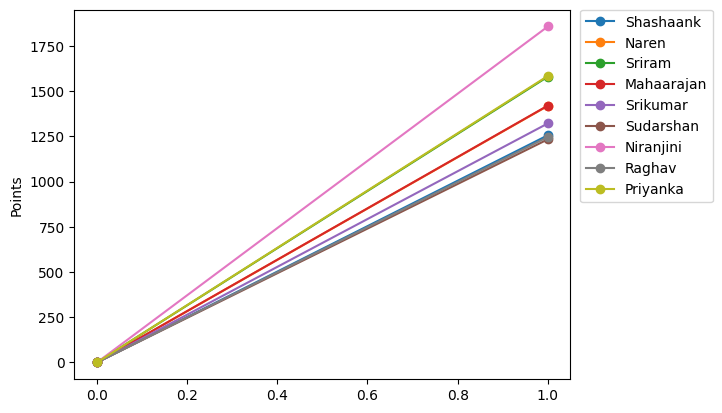

In [ ]:
import matplotlib.pyplot as plt
ax = graph_scores.plot.line(marker='o')
#ax.set_xlabel("Days")
ax.set_ylabel("Points")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [111]:
import pywhatkit

score_msg = str(scores)

pywhatkit.sendwhatmsg("+12064340469", score_msg ,16,49)

In 41 Seconds WhatsApp will open and after 15 Seconds Message will be Delivered!
